# Student Information
Name:吳祁澤

Student ID:109062311

GitHub ID:iamwu30204

---

### Instructions

1. First: do the **take home** exercises in the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2024-Lab1-Master](https://github.com/didiersalazar/DM2024-Lab1-Master.git) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://huggingface.co/datasets/Senem/Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data). The dataset contains a `sentiment` and `comment` columns, with the sentiment labels being: 'nostalgia' and 'not nostalgia'. Read the specificiations of the dataset for background details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/didiersalazar/DM2024-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Sunday)__. 

In [5]:
### Begin Assignment Here
#Second part:
%load_ext autoreload
%autoreload 2
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap
import matplotlib.pyplot as plt
%matplotlib inline
import helpers.data_mining_helpers as dmh
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from PAMI.extras.DF2DB import DenseFormatDF as db
from PAMI.extras.dbStats import TransactionalDatabase as tds
from PAMI.frequentPattern.basic import FPGrowth as alg
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import classification_report, accuracy_score

X = pd.read_csv("Nostalgic_Sentiment_Analysis_of_YouTube_Comments_Data.csv")
X

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


sentiment                                            comment
0     not nostalgia  He was a singer with a golden voice that I lov...
1         nostalgia  The mist beautiful voice ever I listened to hi...
2         nostalgia  I have most of Mr. Reeves songs.  Always love ...
3     not nostalgia  30 day leave from 1st tour in Viet Nam to conv...
4         nostalgia  listening to his songs reminds me of my mum wh...
...             ...                                                ...
1495  not nostalgia  i don't know!..but the opening of the video,.....
1496  not nostalgia  it's sad this is such a beautiful song when yo...
1497  not nostalgia  Dear Friend, I think age and time is not that ...
1498      nostalgia  I was born in 1954 and started to be aware of ...
1499      nostalgia  This is the first CD I bought after my marriag...

[1500 rows x 2 columns]

In [6]:
len(X)

1500

In [7]:
X[0:2]

sentiment                                            comment
0  not nostalgia  He was a singer with a golden voice that I lov...
1      nostalgia  The mist beautiful voice ever I listened to hi...

In [8]:
for t in X["comment"][:2]:
    print(t)

He was a singer with a golden voice that I love to hear all the time. I was his great fan at the age of 16years in those days and still now. Although we have many singers now, but, I can vouch for Jim Reeves all the time. You feel relaxed, emotional and loving. Thank you Lord for his life.
The mist beautiful voice ever I listened to him when I was a kid and still love his singing Never forgotten The voice of an angel


In [9]:
X['nostalgia']=pd.Series(np.arange(X['sentiment'].shape[0]))
for i in range(0,X['sentiment'].shape[0]):
    if(X['sentiment'][i]=='nostalgia'): X.loc[i,'nostalgia'] = 1
    else: X.loc[i,'nostalgia'] = 0
X[:10]

sentiment                                            comment  nostalgia
0  not nostalgia  He was a singer with a golden voice that I lov...          0
1      nostalgia  The mist beautiful voice ever I listened to hi...          1
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...          1
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...          0
4      nostalgia  listening to his songs reminds me of my mum wh...          1
5      nostalgia  Every time I heard this song as a child, I use...          1
6      nostalgia  My dad loved listening to Jim Reeves, when I w...          1
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...          1
8  not nostalgia           Wherever you  are you always in my heart          0
9  not nostalgia  Elvis will always be number one no one can com...          0

In [10]:
X.iloc[:10, 0]

0    not nostalgia
1        nostalgia
2        nostalgia
3    not nostalgia
4        nostalgia
5        nostalgia
6        nostalgia
7        nostalgia
8    not nostalgia
9    not nostalgia
Name: sentiment, dtype: object

In [11]:
X.query('nostalgia==1')

sentiment                                            comment  nostalgia
1     nostalgia  The mist beautiful voice ever I listened to hi...          1
2     nostalgia  I have most of Mr. Reeves songs.  Always love ...          1
4     nostalgia  listening to his songs reminds me of my mum wh...          1
5     nostalgia  Every time I heard this song as a child, I use...          1
6     nostalgia  My dad loved listening to Jim Reeves, when I w...          1
...         ...                                                ...        ...
1488  nostalgia  Yup !!!!  Bringing back an Enormous amount of ...          1
1491  nostalgia  real music...how i miss those days...brings ba...          1
1492  nostalgia  i used to cry over this song cause i had a boy...          1
1498  nostalgia  I was born in 1954 and started to be aware of ...          1
1499  nostalgia  This is the first CD I bought after my marriag...          1

[750 rows x 3 columns]

In [12]:
print(X[X['sentiment']=='nostalgia'].iloc[::10][:5])

    sentiment                                            comment  nostalgia
1   nostalgia  The mist beautiful voice ever I listened to hi...          1
18  nostalgia  My Grandparents had a pub in the 1970's, this ...          1
32  nostalgia  I remember my Mom listening to Jim over and ov...          1
50  nostalgia  If I remember correctly, this song came out af...          1
71  nostalgia  Gosh does this bring back memories. Nearly eve...          1


In [13]:
X.isnull()

sentiment  comment  nostalgia
0         False    False      False
1         False    False      False
2         False    False      False
3         False    False      False
4         False    False      False
...         ...      ...        ...
1495      False    False      False
1496      False    False      False
1497      False    False      False
1498      False    False      False
1499      False    False      False

[1500 rows x 3 columns]

In [14]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            nostalgia  
0  The amoung of missing records is:   
1                                   0

In [15]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
1495    (The amoung of missing records is: , 0)
1496    (The amoung of missing records is: , 0)
1497    (The amoung of missing records is: , 0)
1498    (The amoung of missing records is: , 0)
1499    (The amoung of missing records is: , 0)
Length: 1500, dtype: object

In [16]:
dummy_series = pd.Series(["dummy_record", 1], index=["comment", "nostalgia"])

In [17]:
dummy_series

comment      dummy_record
nostalgia               1
dtype: object

In [18]:
dummy_series.to_frame().T

comment nostalgia
0  dummy_record         1

In [19]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)
len(result_with_series)

1501

In [20]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   1                                   0   

                            nostalgia  
0  The amoung of missing records is:   
1                                   0

In [21]:
dummy_dict = [{'comment': 'dummy_record',
               'nostalgia': 1
              }]

In [22]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)
len(X)

1501

In [23]:
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   1                                   0   

                            nostalgia  
0  The amoung of missing records is:   
1                                   0

In [24]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

sentiment                             comment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                            nostalgia  
0  The amoung of missing records is:   
1                                   0

In [25]:
len(X)

1500

In [26]:
X.duplicated()
#print(X[X.duplicated()])

0       False
1       False
2       False
3       False
4       False
        ...  
1495    False
1496    False
1497    False
1498    False
1499    False
Length: 1500, dtype: bool

In [27]:
sum(X.duplicated())

1

In [28]:
sum(X.duplicated('comment'))

1

In [29]:
dummy_duplicate_dict = [{
                             'sentiment': "dummy category",
                             'comment': 'dummy record',
                             'nostalgia': False
                        },
                        { 
                             'sentiment': "dummy category",
                             'comment': 'dummy record',
                             'nostalgia': False
                        }]

In [30]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
len(X)

1502

In [31]:
sum(X.duplicated())

2

In [32]:
X.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

In [33]:
len(X)

1498

In [34]:
#5.1(sampling)
X_sample = X.sample(n=1000) #random state

In [35]:
len(X_sample)

1000

In [36]:
X_sample[0:4]

sentiment                                            comment  \
356  not nostalgia  What a beautiful song. I would love to fall In...   
519      nostalgia  My father was a big Teresa Brewer fan, he love...   
759  not nostalgia  wow...great interpretation of the song...this ...   
154  not nostalgia  what happened afterwords though, one hit wonde...   

     nostalgia  
356          0  
519          1  
759          0  
154          0

sentiment
nostalgia        750
not nostalgia    748
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

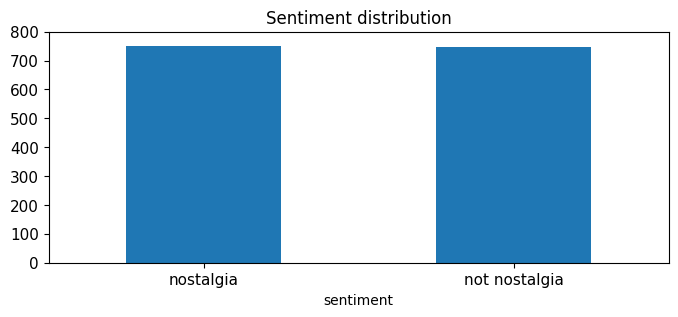

In [37]:
print(X.sentiment.value_counts())

# plot barchart for X
X.sentiment.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, 800],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sentiment
not nostalgia    508
nostalgia        492
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

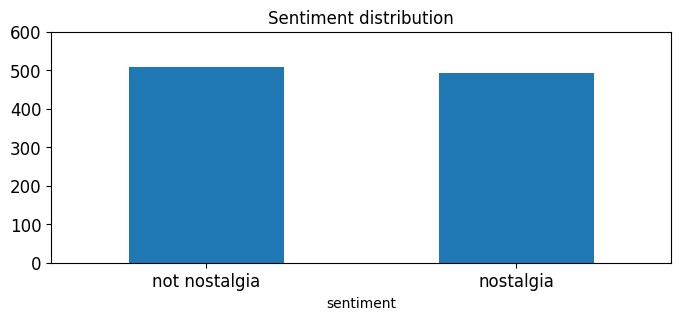

In [38]:
print(X_sample.sentiment.value_counts())

# plot barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, 600], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

sentiment
not nostalgia    508
nostalgia        492
Name: count, dtype: int64


<Axes: title={'center': 'Sentiment distribution'}, xlabel='sentiment'>

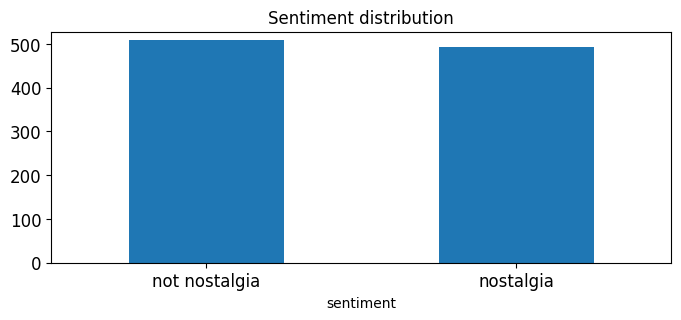

In [39]:
u_bound=max(X_sample.sentiment.value_counts()+20)
print(X_sample.sentiment.value_counts())

# plot barchart for X_sample
X_sample.sentiment.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, u_bound], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

Text(0.5, 0, 'Sentiment')

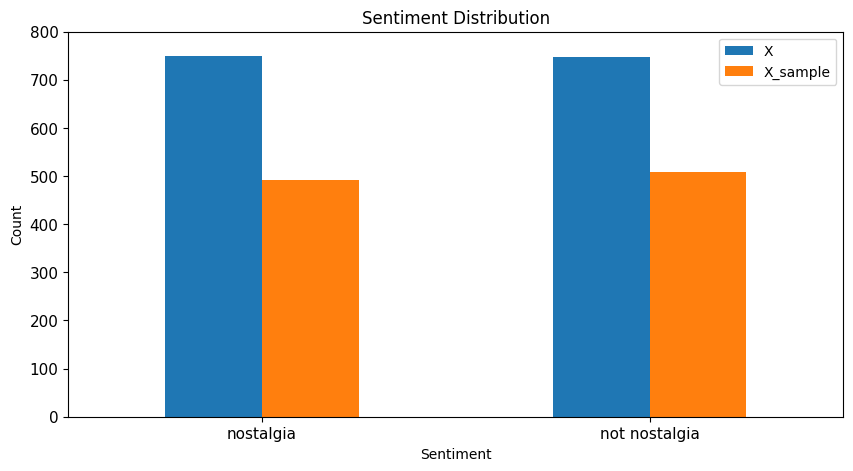

In [40]:
import matplotlib.pyplot as plt

# Get the value counts for both X and X_sample
X_counts = X.sentiment.value_counts()
X_sample_counts = X_sample.sentiment.value_counts()

# Create a DataFrame to align both value counts, filling missing values with 0
combined_counts = pd.DataFrame({'X': X_counts, 'X_sample': X_sample_counts})

# Plot the two value counts as a grouped bar chart
ax = combined_counts.plot(kind='bar',
                          title='Sentiment Distribution',
                          ylim=[0,800],   # Adjust to accommodate both sets
                          rot=0, fontsize=11, figsize=(10,5))

# Set axis labels
ax.set_ylabel('Count')
ax.set_xlabel('Sentiment')

In [41]:
#5.2(feature creation)
X['unigrams'] = X['comment'].apply(lambda x: dmh.tokenize_text(x))

In [42]:
X[0:4]["unigrams"]

0    [He, was, a, singer, with, a, golden, voice, t...
1    [The, mist, beautiful, voice, ever, I, listene...
2    [I, have, most, of, Mr., Reeves, songs, ., Alw...
3    [30, day, leave, from, 1st, tour, in, Viet, Na...
Name: unigrams, dtype: object

In [43]:
X[0:4]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   

   nostalgia                                           unigrams  
0          0  [He, was, a, singer, with, a, golden, voice, t...  
1          1  [The, mist, beautiful, voice, ever, I, listene...  
2          1  [I, have, most, of, Mr., Reeves, songs, ., Alw...  
3          0  [30, day, leave, from, 1st, tour, in, Viet, Na...

In [44]:
list(X[0:1]['unigrams'])

[['He',
  'was',
  'a',
  'singer',
  'with',
  'a',
  'golden',
  'voice',
  'that',
  'I',
  'love',
  'to',
  'hear',
  'all',
  'the',
  'time',
  '.',
  'I',
  'was',
  'his',
  'great',
  'fan',
  'at',
  'the',
  'age',
  'of',
  '16years',
  'in',
  'those',
  'days',
  'and',
  'still',
  'now',
  '.',
  'Although',
  'we',
  'have',
  'many',
  'singers',
  'now',
  ',',
  'but',
  ',',
  'I',
  'can',
  'vouch',
  'for',
  'Jim',
  'Reeves',
  'all',
  'the',
  'time',
  '.',
  'You',
  'feel',
  'relaxed',
  ',',
  'emotional',
  'and',
  'loving',
  '.',
  'Thank',
  'you',
  'Lord',
  'for',
  'his',
  'life',
  '.']]

In [45]:
#5.3(Feature subset selection)
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.comment) #learn the vocabulary and return document-term matrix
print(X_counts[0])

  (np.int32(0), np.int32(1598))	1
  (np.int32(0), np.int32(3570))	2
  (np.int32(0), np.int32(2973))	1
  (np.int32(0), np.int32(3650))	1
  (np.int32(0), np.int32(1470))	1
  (np.int32(0), np.int32(3534))	1
  (np.int32(0), np.int32(3282))	1
  (np.int32(0), np.int32(2028))	1
  (np.int32(0), np.int32(3336))	1
  (np.int32(0), np.int32(1606))	1
  (np.int32(0), np.int32(233))	2
  (np.int32(0), np.int32(3284))	3
  (np.int32(0), np.int32(3328))	2
  (np.int32(0), np.int32(1651))	2
  (np.int32(0), np.int32(1512))	1
  (np.int32(0), np.int32(1249))	1
  (np.int32(0), np.int32(323))	1
  (np.int32(0), np.int32(214))	1
  (np.int32(0), np.int32(2341))	1
  (np.int32(0), np.int32(15))	1
  (np.int32(0), np.int32(1733))	1
  (np.int32(0), np.int32(3304))	1
  (np.int32(0), np.int32(907))	1
  (np.int32(0), np.int32(258))	2
  (np.int32(0), np.int32(3124))	1
  (np.int32(0), np.int32(2328))	2
  (np.int32(0), np.int32(245))	1
  (np.int32(0), np.int32(3581))	1
  (np.int32(0), np.int32(1591))	1
  (np.int32(0), np.int

In [46]:
feature_names = count_vect.get_feature_names_out()

In [47]:
count_vect.get_feature_names_out()[1488]

'graduation'

In [48]:
count_vect.get_feature_names_out()[2902]

'sha'

In [49]:
count_vect.get_feature_names_out()[869]

'curious'

In [50]:
count_vect.get_feature_names_out()[401]

'beach'

In [51]:
analyze = count_vect.build_analyzer()
analyze(X.comment[0])

['he',
 'was',
 'singer',
 'with',
 'golden',
 'voice',
 'that',
 'love',
 'to',
 'hear',
 'all',
 'the',
 'time',
 'was',
 'his',
 'great',
 'fan',
 'at',
 'the',
 'age',
 'of',
 '16years',
 'in',
 'those',
 'days',
 'and',
 'still',
 'now',
 'although',
 'we',
 'have',
 'many',
 'singers',
 'now',
 'but',
 'can',
 'vouch',
 'for',
 'jim',
 'reeves',
 'all',
 'the',
 'time',
 'you',
 'feel',
 'relaxed',
 'emotional',
 'and',
 'loving',
 'thank',
 'you',
 'lord',
 'for',
 'his',
 'life']

In [52]:
X_counts.shape

(1498, 3730)

In [53]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '045', '07', '10', '100', '10m', '11', '11th', '12'],
      dtype=object)

In [54]:
X_counts.shape

(1498, 3730)

In [55]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [56]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [57]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in X.index[0:20]]
plot_z = X_counts[0:20, 0:20].toarray() #X_counts[how many documents, how many terms]
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

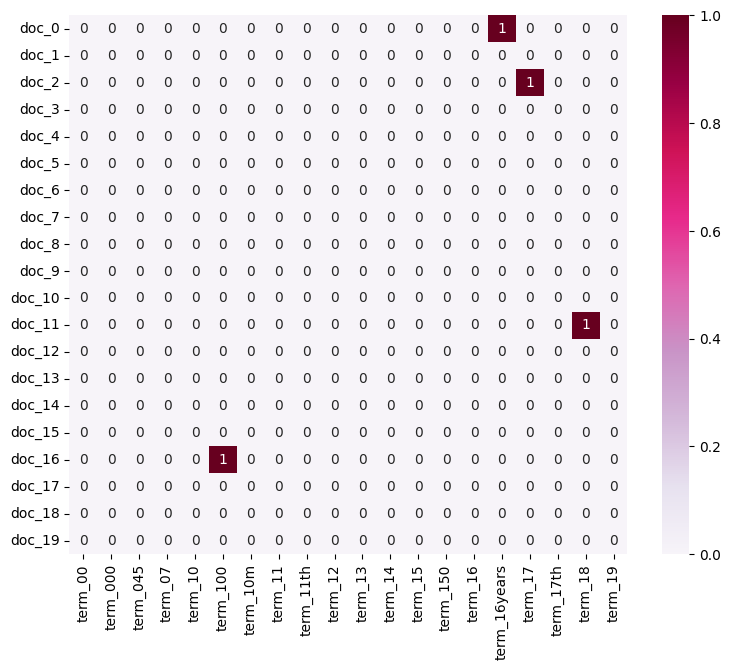

In [58]:
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

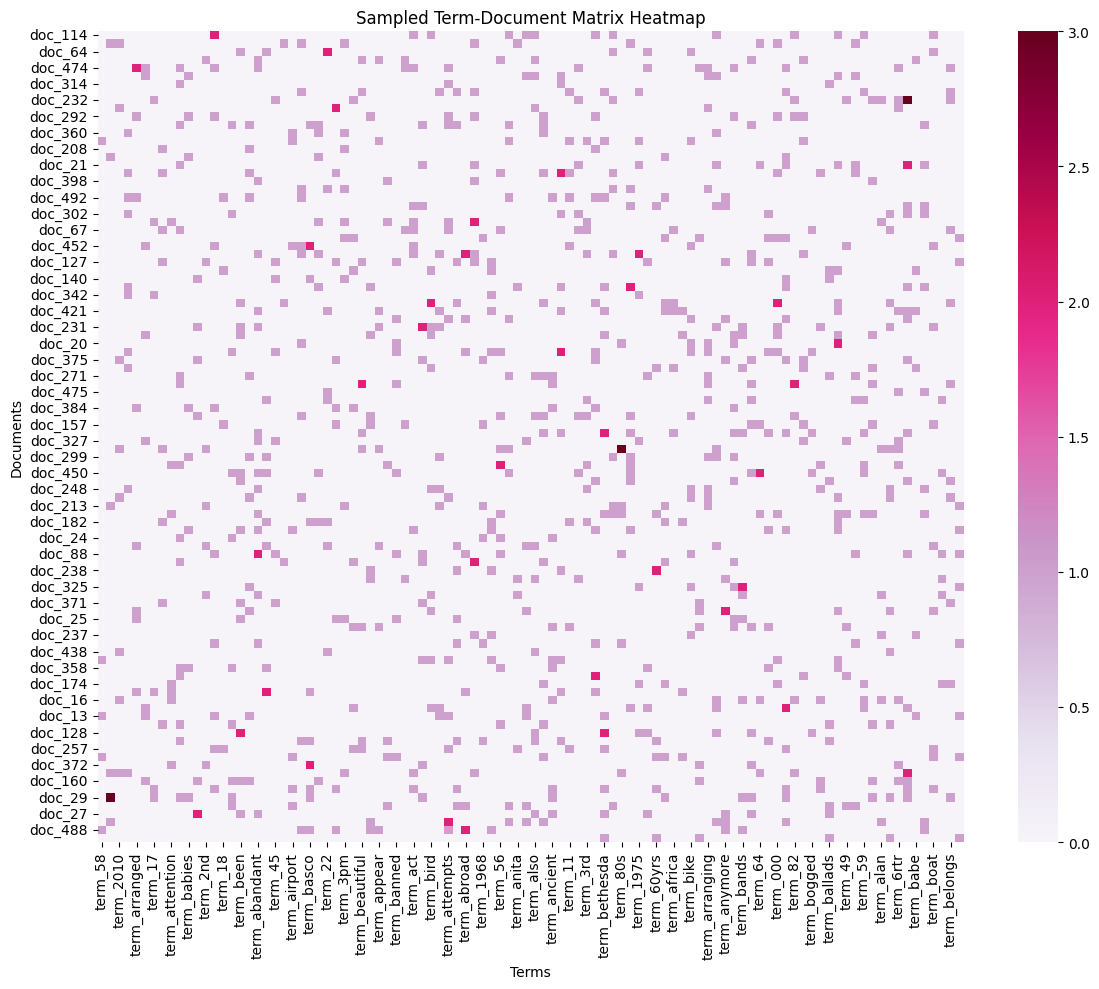

In [59]:
#exercise 11
# Answer here
term_document_matrix = np.random.poisson(0.1, (500, 500))  # Example sparse matrix

# Step 1: Convert to DataFrame for better handling
df_tdm = pd.DataFrame(term_document_matrix, columns=["term_"+str(i) for i in count_vect.get_feature_names_out()[0:500]], index=["doc_"+ str(i) for i in X.index[0:500]])

# Step 2: Optionally sample part of the large matrix for clarity
# Sample 100 documents and 100 terms randomly for visualization
df_sampled = df_tdm.sample(n=100, axis=0).sample(n=100, axis=1)

# Step 3: Plot heatmap for sampled data
plt.figure(figsize=(12, 10))
sns.heatmap(df_sampled, cmap="PuRd", vmin=0, vmax=df_sampled.values.max(), annot=False, cbar=True)
plt.title("Sampled Term-Document Matrix Heatmap")
plt.xlabel("Terms")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()

In [60]:
#5.4(Attribute Transformation / Aggregation)
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] #sum of first term: 00

np.int64(1)

C:\Users\user\AppData\Local\Temp\ipykernel_4632\3480579971.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


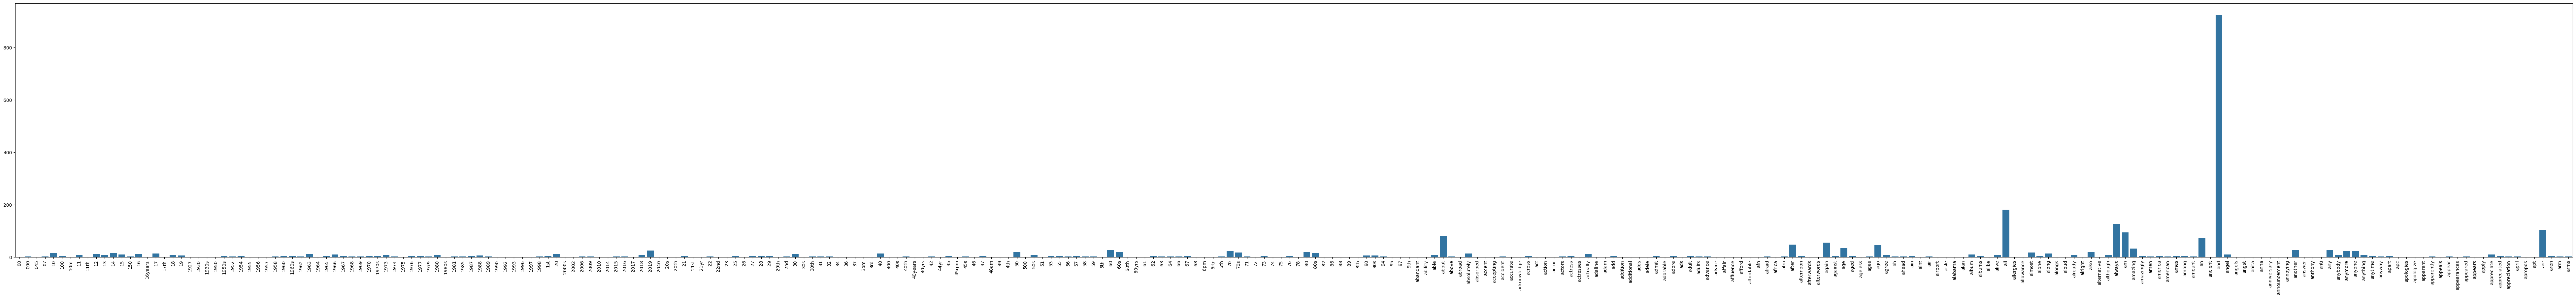

In [61]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [62]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

# Sample data: Replace these with your actual data
x = count_vect.get_feature_names_out()[:300]  # Features (top 300)
y = term_frequencies[:300]  # Corresponding frequencies

# Create a bar plot
fig = go.Figure([go.Bar(x=x, y=y)])

# Customize layout to rotate tick labels
fig.update_layout(
    xaxis=dict(tickangle=90),  # Rotate x-axis labels
    height=500, width=1200,  # Adjust the figure size
    title="Top 300 Features by Frequency",
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)

# Show the figure
fig.show()

In [63]:
#exercise 13
# Answer here

# Assuming X_counts is your term-document matrix
# Compute term frequencies (total count across all documents)
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()

# Get the vocabulary (term names)
vocab = count_vect.get_feature_names_out()

df_term_frequencies = pd.DataFrame({
    'Term': vocab,
    'Frequency': term_frequencies
})

# Step 1: Sort by frequency and keep only top N terms (e.g., top 100)
top_n = 300  
df_top_n = df_term_frequencies.sample(n=top_n)

# Step 2: Plot the top N terms using Plotly
fig = px.bar(df_top_n, x='Term', y='Frequency')

# Step 3: Customize the plot
fig.update_layout(
    title=f"Random {top_n} Frequent Terms",
    xaxis_tickangle=-90,  # Rotate x-axis labels for readability
    height=500,
    width=1200,
    xaxis_title="Terms",
    yaxis_title="Frequency"
)

# Show the interactive plot
fig.show()

In [64]:
x = count_vect.get_feature_names_out()[:300]  # Features (top 300)
y = term_frequencies[:300]  # Corresponding frequencies

# Sort terms by frequency
sorted_indices = np.argsort(y)[::-1]  # Sort in descending order of frequency
sorted_x = np.array(x)[sorted_indices]
sorted_y = np.array(y)[sorted_indices]

# Create a bar plot with sorted data
fig = go.Figure([go.Bar(x=sorted_x, y=sorted_y)])

# Customize layout to rotate tick labels
fig.update_layout(
    xaxis=dict(tickangle=90),  # Rotate x-axis labels
    height=500, width=1200,  # Adjust the figure size
    title="Top 300 Features by Frequency",
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)

# Show the figure
fig.show()


C:\Users\user\AppData\Local\Temp\ipykernel_4632\2426724564.py:6: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



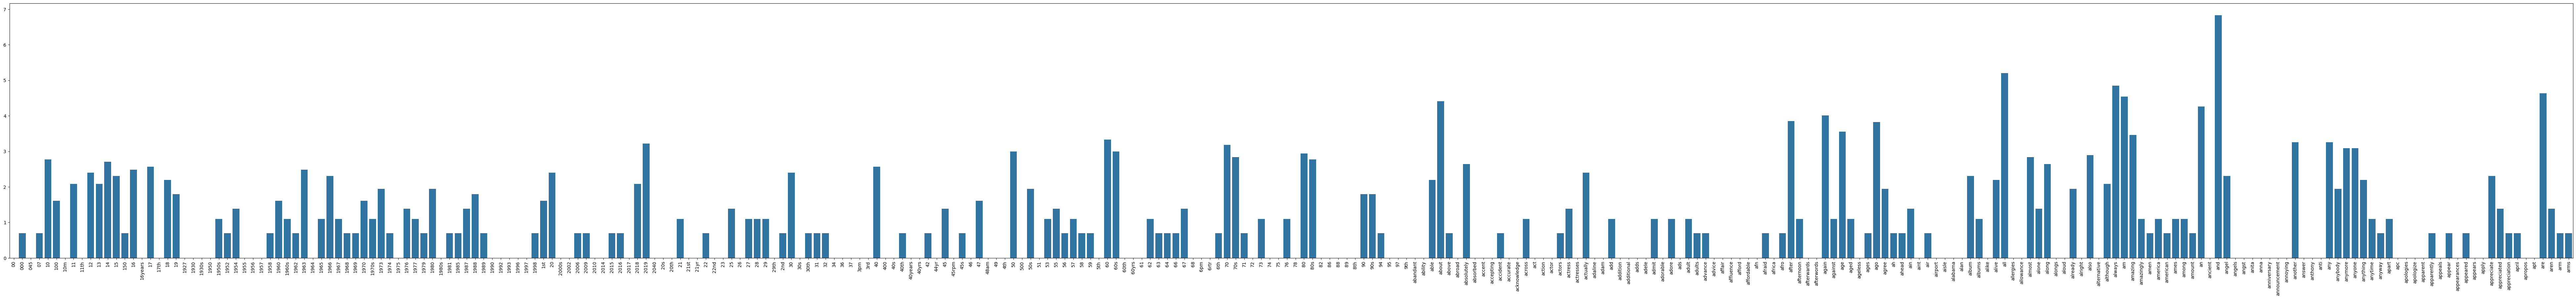

In [65]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [66]:
x = count_vect.get_feature_names_out()[:300]  # Features (top 300)
y = term_frequencies_log[:300]  # Corresponding frequencies

# Sort terms by frequency
sorted_indices = np.argsort(y)[::-1]  # Sort in descending order of frequency
sorted_x = np.array(x)[sorted_indices]
sorted_y = np.array(y)[sorted_indices]

# Create a bar plot with sorted data
fig = go.Figure([go.Bar(x=sorted_x, y=sorted_y)])

# Customize layout to rotate tick labels
fig.update_layout(
    xaxis=dict(tickangle=90),  # Rotate x-axis labels
    height=500, width=1200,  # Adjust the figure size
    title="Top 300 Features by Frequency",
    xaxis_title="Terms",
    yaxis_title="Frequencies"
)

# Show the figure
fig.show()

In [67]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each category
categories = X['sentiment'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['comment'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

In [68]:
category_number=0 #You can change it from 0 to 3
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
filt_term_document_dfs[categories[category_number]]

Filtered Term-Document Frequency DataFrame for Category not nostalgia:


00  000  045  10  100  10m  11  12  14  15  ...  youngest  youngsters  \
0     0    0    0   0    0    0   0   0   0   0  ...         0           0   
1     0    0    0   0    0    0   0   0   0   0  ...         0           0   
2     0    0    0   0    0    0   0   0   0   0  ...         0           0   
3     0    0    0   0    0    0   0   0   0   0  ...         0           0   
4     0    0    0   0    0    0   0   0   0   0  ...         0           0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ..  ...       ...         ...   
743   0    0    0   0    0    0   0   0   0   0  ...         0           0   
744   0    0    0   0    0    0   0   0   0   0  ...         0           0   
745   0    0    0   0    0    0   0   0   0   0  ...         0           0   
746   0    0    0   0    0    0   0   0   0   0  ...         0           0   
747   0    0    0   0    0    0   0   0   0   0  ...         0           0   

     your  yourself  youth  youtube  yrs  yuo  zealand  zulus  
0       0         0      0        0    0    0        0      0  
1       0         0      0        0    0    0        0      0  
2       0         0      0        0    0    0        0      0  
3       0         0      0        0    0    0        0      0  
4       0         0      0        0    0    0        0      0  
..    ...       ...    ...      ...  ...  ...      ...    ...  
743     0         0      0        0    0    0        0      0  
744     0         0      0        0    0    0        0      0  
745     0         0      0        0    0    0        0      0  
746     1         0      0        0    0    0        0      0  
747     0         0      0        0    0    0        0      0  

[748 rows x 2602 columns]

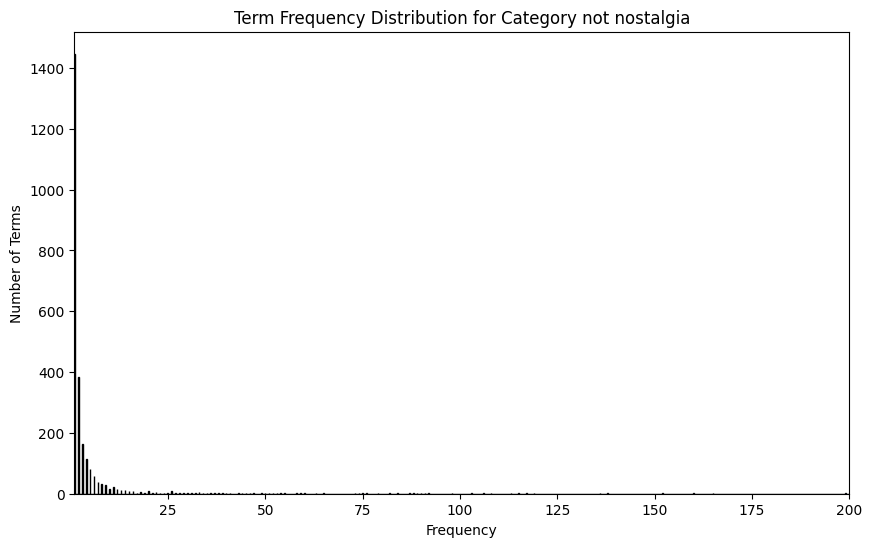

In [69]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()
 
# Visualize the frequency distribution
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
plt.title(f'Term Frequency Distribution for Category {categories[category_number]}')
plt.xlabel('Frequency')
plt.ylabel('Number of Terms')
plt.xlim(1, 200)
plt.show()

In [70]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

# Calculate the index corresponding to the top 5% most frequent terms
total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)

# Get the indices of the top 5% most frequent terms
top_5_percent_indices = sorted_indices[:top_5_percent_index]

# Filter terms that belong to the top 5% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5%: {top_5_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in top 5%: 130
Filtered terms: ['the', 'and', 'this', 'to', 'of', 'song', 'it', 'is', 'in', 'you', 'that', 'my', 'love', 'music', 'was', 'for', 'so', 'have', 'one', 'like', 'but', 'he', 'with', 'great', 'all', 'on', 'not', 'be', 'what', 'can', 'me', 'voice', 'just', 'songs', 'beautiful', 'as', 'time', 'her', 'she', 'will', 'they', 'when', 'from', 'his', 'at', 'are', 'always', 'good', 'no', 'know', 'now', 'much', 'about', 'never', 'who', 'really', 'more', 'if', 'we', 'best', 'by', 'ever', 'think', 'would', 'thank', 'only', 'still', 'how', 'don', 'has', 'very', 'am', 'there', 'out', 'him', 'could', 'these', 'up', 'old', 'listen', 'hear', 'do', 'singer', 'an', 'many', 'had', 'here', 'version', 'too', 'such', 'today', 'been', 'world', 'your', 'people', 'most', 'get', 'some', 'video', 'man', 'listening', 'heard', 'sing', 'than', 'were', 'years', 'real', 'heart', 'nice', 'singing', 'their', 'better', 'life', 'its', 'day', 'sad', 'god', 'then', 'way', '

In [71]:
sorted_counts #We can see the frequencies sorted in a descending order

array([708, 451, 451, ...,   1,   1,   1])

In [72]:
sorted_indices #This are the indices corresponding to the words after being sorted in a descending order

array([2276,  160, 2290, ..., 2600,   12,    7])

In [73]:
filt_term_document_dfs[categories[category_number]].loc[:,'the'].sum(axis=0) #Here we can sum up the column corresponding to the top 5% words, we just specify which one first.

np.int64(708)

In [74]:
category_number=0 #You can change it from 0 to 3
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

# Sort the term frequencies in ascending order and get sorted indices
sorted_indices = np.argsort(word_counts)  # Get indices of sorted frequencies
sorted_counts = word_counts[sorted_indices]  # Sort frequencies

# Calculate the index corresponding to the bottom 1% least frequent terms
total_terms = len(sorted_counts)
bottom_1_percent_index = int(0.01 * total_terms)

# Get the indices of the bottom 1% least frequent terms
bottom_1_percent_indices = sorted_indices[:bottom_1_percent_index]

# Filter terms that belong to the bottom 1% based on their rank
filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in bottom_1_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in bottom 1%: {bottom_1_percent_index}")
print(f"Filtered terms: {filtered_words}")

Category: not nostalgia
Number of terms in bottom 1%: 26
Filtered terms: ['12', '16years', 'zealand', 'sensitive', 'sense', 'xd', 'wwii', 'wuv', 'writers', 'writer', 'wrenching', 'wouldn', '1998', 'measure', 'spine', 'spewing', '2040', '2018', '2017', '2010', '1957', '1955', '1952', '1930s', '1930', '17th']


In [75]:
sorted_counts #We can see the frequencies sorted in an ascending order

array([  1,   1,   1, ..., 451, 451, 708])

In [76]:
sorted_indices #This are the indices corresponding to the words after being sorted in an ascending order

array([   7,   12, 2600, ..., 2290,  160, 2276])

In [77]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]


For category not nostalgia we filter the following words:
Bottom 1.0% words: 
12           1
16years      1
zealand      1
sensitive    1
sense        1
xd           1
wwii         1
wuv          1
writers      1
writer       1
wrenching    1
wouldn       1
1998         1
measure      1
spine        1
spewing      1
2040         1
2018         1
2017         1
2010         1
1957         1
1955         1
1952         1
1930s        1
1930         1
17th         1
dtype: int64
Top 5.0% words: 
first       23
got         23
classic     23
wish        24
any         25
          ... 
of         361
to         394
this       451
and        451
the        708
Length: 130, dtype: int64

For category nostalgia we filter the following words:
Bottom 1.0% words: 
yo         1
yet        1
yester     1
yeas       1
yearn      1
yeah       1
1952       1
1950       1
1969       1
1964       1
lp         1
safety     1
safer      1
saddest    1
seeing     1
lou        1
proud      1
protest    1
2

00  000  045  10  100  10m  11  14  15  150  ...  young  younger  \
0     0    0    0   0    0    0   0   0   0    0  ...      0        0   
1     0    0    0   0    0    0   0   0   0    0  ...      0        0   
2     0    0    0   0    0    0   0   0   0    0  ...      0        0   
3     0    0    0   0    0    0   0   0   0    0  ...      0        0   
4     0    0    0   0    0    0   0   0   0    0  ...      0        0   
..   ..  ...  ...  ..  ...  ...  ..  ..  ..  ...  ...    ...      ...   
743   0    0    0   0    0    0   0   0   0    0  ...      0        0   
744   0    0    0   0    0    0   0   0   0    0  ...      0        0   
745   0    0    0   0    0    0   0   0   0    0  ...      0        0   
746   0    0    0   0    0    0   0   0   0    0  ...      0        0   
747   0    0    0   0    0    0   0   0   0    0  ...      0        0   

     youngest  youngsters  yourself  youth  youtube  yrs  yuo  zulus  
0           0           0         0      0        0    0    0      0  
1           0           0         0      0        0    0    0      0  
2           0           0         0      0        0    0    0      0  
3           0           0         0      0        0    0    0      0  
4           0           0         0      0        0    0    0      0  
..        ...         ...       ...    ...      ...  ...  ...    ...  
743         0           0         0      0        0    0    0      0  
744         0           0         0      0        0    0    0      0  
745         0           0         0      0        0    0    0      0  
746         0           0         0      0        0    0    0      0  
747         0           0         0      0        0    0    0      0  

[748 rows x 2446 columns]

In [78]:
#exercise 16

In [79]:
# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = db.DenseFormatDF(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)

Database size (total no of transactions) : 734
Number of items : 2159
Minimum Transaction Size : 1
Average Transaction Size : 8.696185286103542
Maximum Transaction Size : 39
Standard Deviation Transaction Size : 7.20498326251217
Variance in Transaction Sizes : 51.982604800547186
Sparsity : 0.9959721235358483


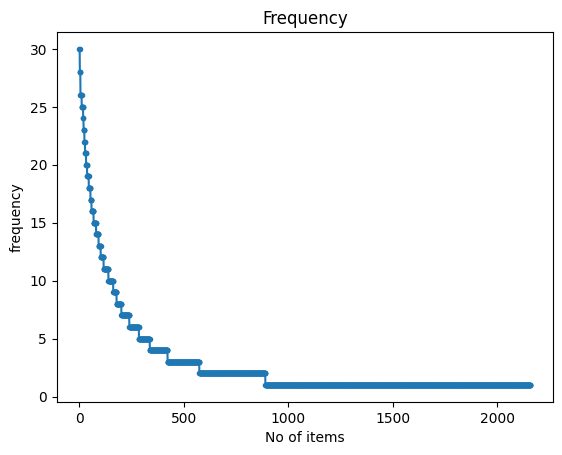

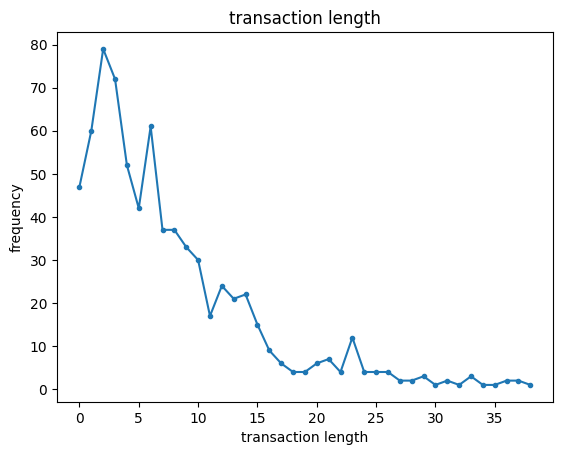

In [80]:
obj = tds.TransactionalDatabase('td_freq_db_nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

Database size (total no of transactions) : 745
Number of items : 2446
Minimum Transaction Size : 1
Average Transaction Size : 8.405369127516778
Maximum Transaction Size : 47
Standard Deviation Transaction Size : 5.966526146738824
Variance in Transaction Sizes : 35.64728296168002
Sparsity : 0.9965636266853979


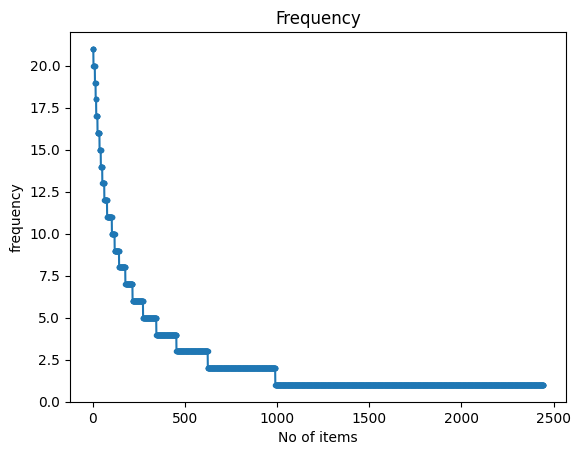

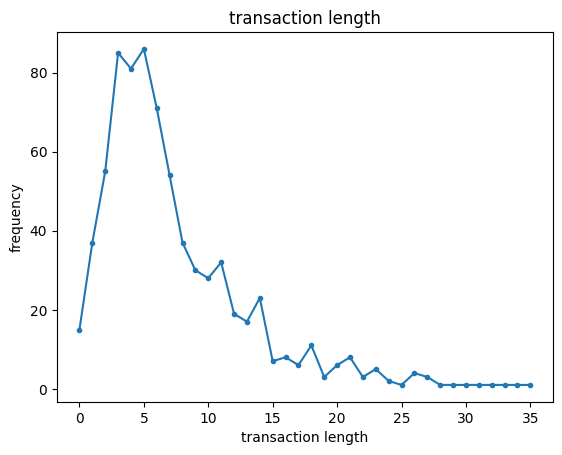

In [81]:
obj = tds.TransactionalDatabase('td_freq_db_not nostalgia.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [82]:
minSup=5
obj1 = alg.FPGrowth(iFile='td_freq_db_nostalgia.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_nostalgia= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 363
Runtime: 0.014958620071411133


In [83]:
obj1.save('freq_patterns_nostalgia_minSup5.txt') #save the patterns
frequentPatternsDF_nostalgia

Patterns  Support
0       angel        5
1        town        5
2    everyday        5
3        able        5
4     married        5
..        ...      ...
358      ever       28
359     would       28
360        go       28
361     takes       30
362  favorite       30

[363 rows x 2 columns]

In [84]:
minSup=5
obj2 = alg.FPGrowth(iFile='td_freq_db_not nostalgia.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_not_nostalgia= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_not_nostalgia))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 355
Runtime: 0.011996746063232422


In [85]:
obj2.save('freq_patterns_not_nostalgia_minSup5.txt') #save the patterns
frequentPatternsDF_not_nostalgia

Patterns  Support
0       leave        5
1      number        5
2      father        5
3    remember        5
4         100        5
..        ...      ...
350     elvis       21
351     every       21
352     loved       21
353      them       21
354    lyrics       21

[355 rows x 2 columns]

In [86]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_nostalgia, frequentPatternsDF_not_nostalgia]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
194     takes       30
192      ever       28
193     would       28
186       kid       26
190      wish       26
..        ...      ...
4      senior        5
3     married        5
2        able        5
1    everyday        5
0        town        5

[382 rows x 2 columns]
Number of patterns discarded: 336


In [87]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['comment'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_comment'] = X['comment'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_comment'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df
#tdm_df

00  000  045  07  10  100  10m  11  11th  12  ...  girls  carpenters  \
0      0    0    0   0   0    0    0   0     0   0  ...      0           0   
1      0    0    0   0   0    0    0   0     0   0  ...      0           0   
2      0    0    0   0   0    0    0   0     0   0  ...      0           0   
3      0    0    0   0   0    0    0   0     0   0  ...      0           0   
4      0    0    0   0   0    0    0   0     0   0  ...      0           0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...         ...   
1495   0    0    0   0   0    0    0   0     0   0  ...      0           0   
1496   0    0    0   0   0    0    0   0     0   0  ...      0           0   
1497   0    0    0   0   0    0    0   0     0   0  ...      0           0   
1498   0    0    0   0   0    0    0   0     0   0  ...      0           0   
1499   0    0    0   0   0    0    0   0     0   0  ...      0           0   

      does anyone  weeks  took  senior  married  able  everyday  town  
0               0      0     0       0        0     0         0     0  
1               0      0     0       0        0     0         0     0  
2               0      0     0       0        0     0         0     1  
3               0      0     0       0        0     0         0     0  
4               0      0     0       0        0     0         1     0  
...           ...    ...   ...     ...      ...   ...       ...   ...  
1495            0      0     0       0        0     0         0     0  
1496            0      0     0       0        0     0         0     0  
1497            0      0     0       0        0     0         0     0  
1498            0      0     0       0        0     0         0     0  
1499            0      0     0       0        0     0         0     0  

[1498 rows x 4112 columns]

In [88]:
#exercise 17

In [89]:
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] 系統找不到指定的檔案。
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\users\user\appdata\local\programs\python\python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\users\user\appdata\local\programs\python\python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\users\user\appdata\local\programs\python\python39\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pi

In [90]:
X_pca_tdm.shape

(1498, 2)

In [91]:
X_tsne_tdm.shape

(1498, 2)

In [92]:
X_umap_tdm.shape

(1498, 2)

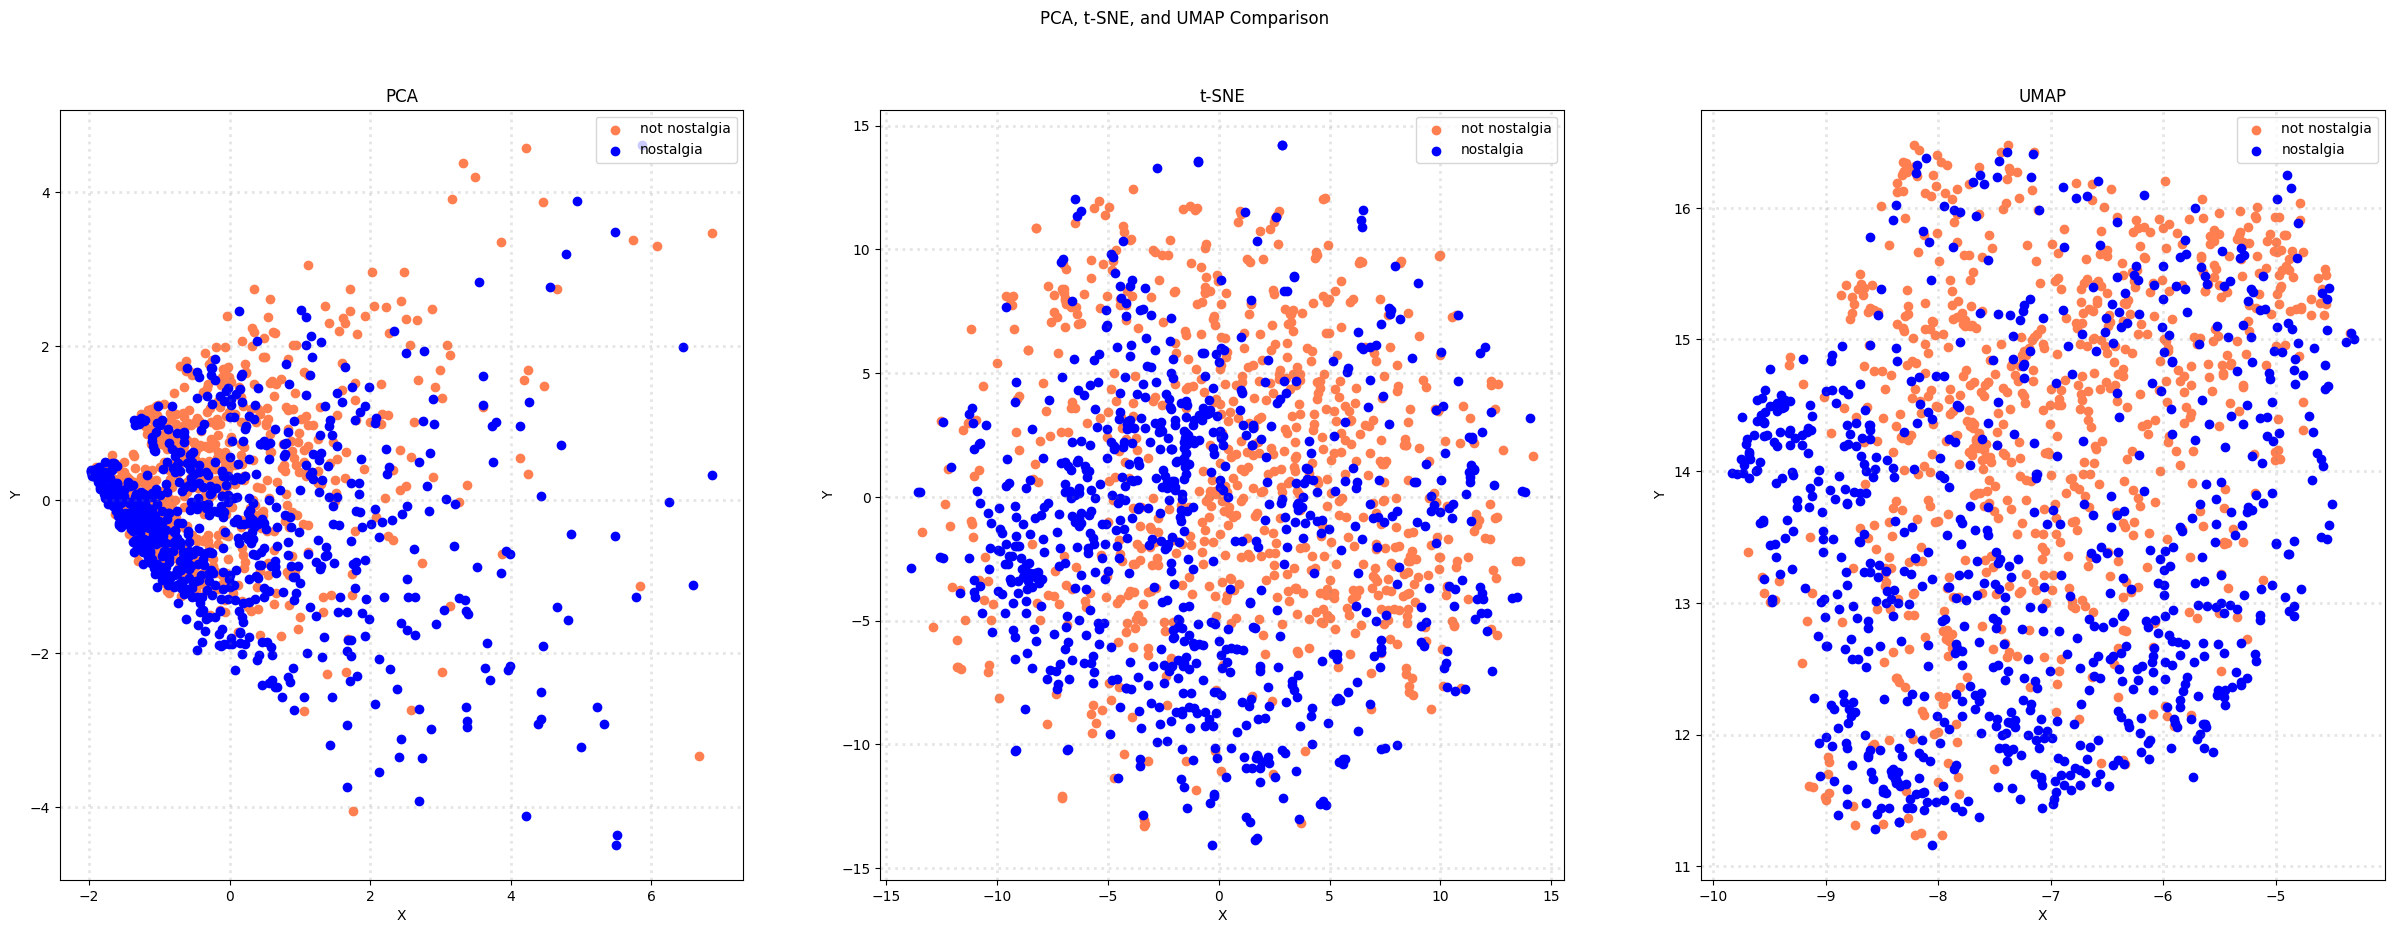

In [93]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [94]:
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

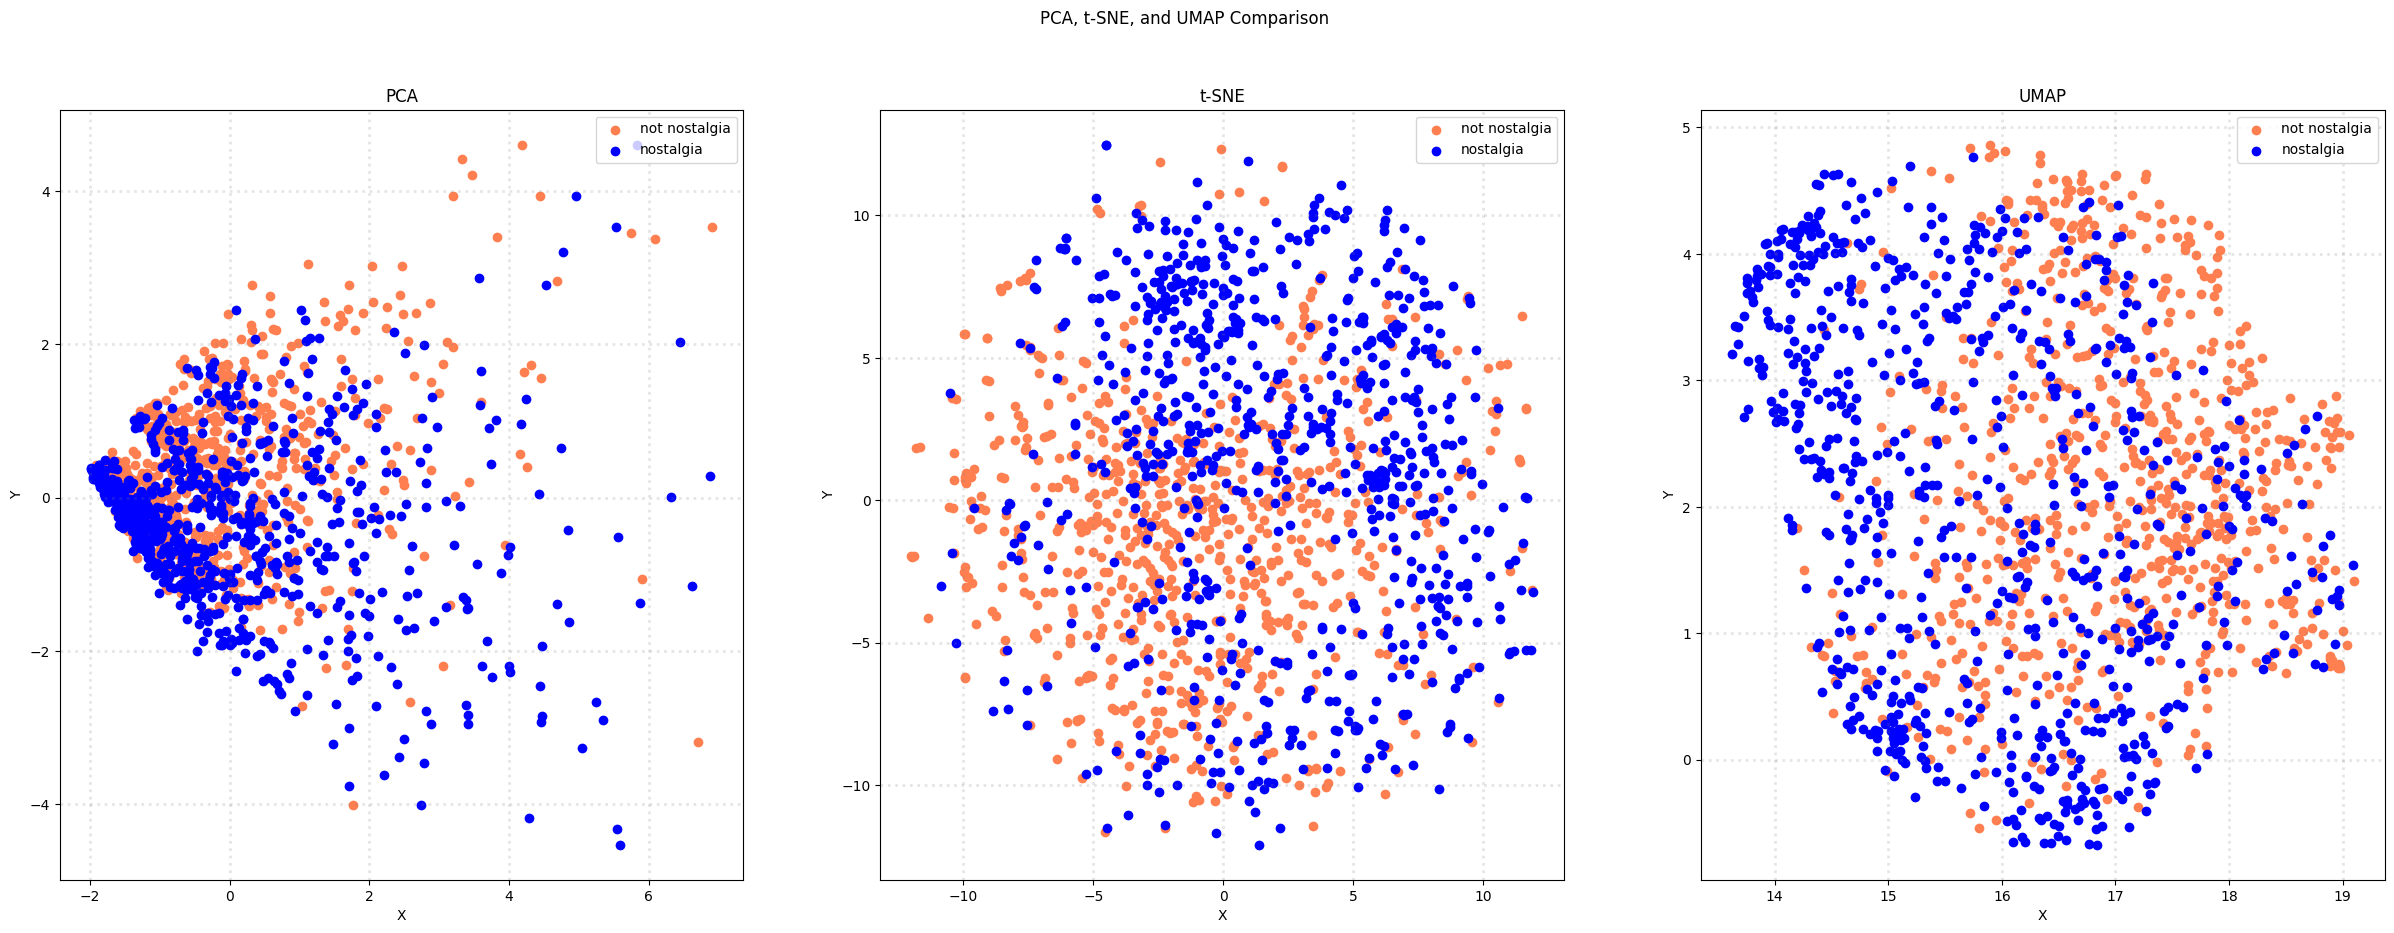

In [95]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category].T[0]
        ys = X_reduced[X['sentiment'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

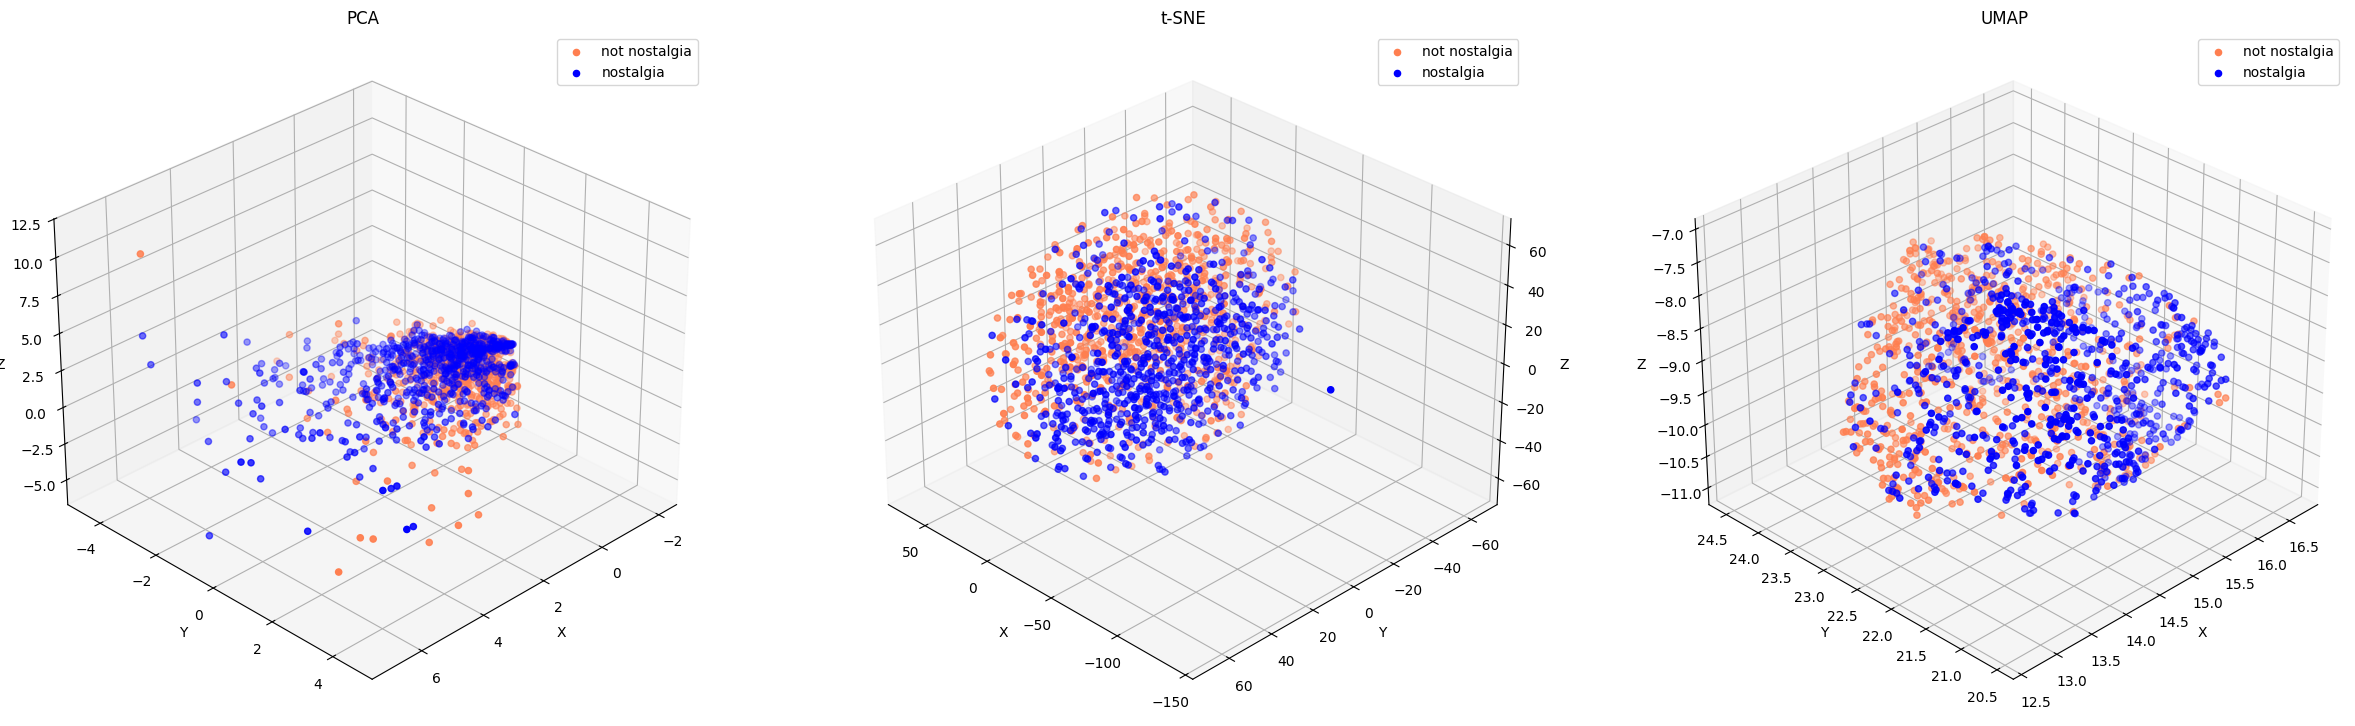

In [96]:
#exercise 18
# Answer here
from mpl_toolkits.mplot3d import Axes3D

# Answer here
# Applying dimensionality reduction with PCA, t-SNE, and UMAP
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment'].unique() 

# Create 3D subplots
fig = plt.figure(figsize=(30, 10))

# Function to create a 3D scatter plot
def plot_3d_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment'] == category][:, 0]
        ys = X_reduced[X['sentiment'] == category][:, 1]
        zs = X_reduced[X['sentiment'] == category][:, 2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend(loc='upper right')

# Create 3D scatter plots for PCA, t-SNE, and UMAP
ax1 = fig.add_subplot(131, projection='3d')
plot_3d_scatter(ax1, X_pca_aug, 'PCA')

ax2 = fig.add_subplot(132, projection='3d')
plot_3d_scatter(ax2, X_tsne_aug, 't-SNE')

ax3 = fig.add_subplot(133, projection='3d')
plot_3d_scatter(ax3, X_umap_aug, 'UMAP')

# Adjust view angles
ax1.view_init(elev=30, azim=45)
ax2.view_init(elev=30, azim=135)
ax3.view_init(elev=30, azim=225)

plt.show()

In [97]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.nostalgia)

LabelBinarizer()

In [98]:
X['bin_category'] = mlb.transform(X['nostalgia']).tolist()
X[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

   nostalgia                                           unigrams  \
0          0  [He, was, a, singer, with, a, golden, voice, t...   
1          1  [The, mist, beautiful, voice, ever, I, listene...   
2          1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3          0  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4          1  [listening, to, his, songs, reminds, me, of, m...   
5          1  [Every, time, I, heard, this, song, as, a, chi...   
6          1  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7          1  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8          0   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment bin_category  
0  {voice, vouch, great, with, hear, life., now.,...          [0]  
1  {listened, voice, him, singing, love, to, The,...          [1]  
2  {Always, most, who, comforting, great, early.,...          [1]  
3  {who, day, this, from, God, can, 2nd, December...          [0]  
4  {of, listening, who, his, him, everyday, me, m...          [1]  
5  {voice, it, this, death,, used, RIP, to, heard...          [1]  
6  {didn't, loved, it, but, Time, to, Jim, listen...          [1]  
7  {he, since, with, puts, to, love, Jim, 71, LIS...          [1]  
8        {you, always, heart, are, Wherever, my, in}          [0]

In [99]:
#exercise 19
# Answer here
mlb.fit(X.sentiment)
X['bin_category'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

sentiment                                            comment  \
0  not nostalgia  He was a singer with a golden voice that I lov...   
1      nostalgia  The mist beautiful voice ever I listened to hi...   
2      nostalgia  I have most of Mr. Reeves songs.  Always love ...   
3  not nostalgia  30 day leave from 1st tour in Viet Nam to conv...   
4      nostalgia  listening to his songs reminds me of my mum wh...   
5      nostalgia  Every time I heard this song as a child, I use...   
6      nostalgia  My dad loved listening to Jim Reeves, when I w...   
7      nostalgia  i HAVE ALSO LISTENED TO Jim Reeves since child...   
8  not nostalgia           Wherever you  are you always in my heart   

   nostalgia                                           unigrams  \
0          0  [He, was, a, singer, with, a, golden, voice, t...   
1          1  [The, mist, beautiful, voice, ever, I, listene...   
2          1  [I, have, most, of, Mr., Reeves, songs, ., Alw...   
3          0  [30, day, leave, from, 1st, tour, in, Viet, Na...   
4          1  [listening, to, his, songs, reminds, me, of, m...   
5          1  [Every, time, I, heard, this, song, as, a, chi...   
6          1  [My, dad, loved, listening, to, Jim, Reeves, ,...   
7          1  [i, HAVE, ALSO, LISTENED, TO, Jim, Reeves, sin...   
8          0   [Wherever, you, are, you, always, in, my, heart]   

                                   tokenized_comment bin_category  
0  {voice, vouch, great, with, hear, life., now.,...          [1]  
1  {listened, voice, him, singing, love, to, The,...          [0]  
2  {Always, most, who, comforting, great, early.,...          [0]  
3  {who, day, this, from, God, can, 2nd, December...          [1]  
4  {of, listening, who, his, him, everyday, me, m...          [0]  
5  {voice, it, this, death,, used, RIP, to, heard...          [0]  
6  {didn't, loved, it, but, Time, to, Jim, listen...          [0]  
7  {he, since, with, puts, to, love, Jim, 71, LIS...          [0]  
8        {you, always, heart, are, Wherever, my, in}          [1]

In [100]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['comment']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['comment']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['comment']
document_to_transform_3.append(random_record_3)

In [101]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['If I remember correctly, this song came out after Mr. Reeves passed away. I was about 10 years old when the disc jockey said that the news just came over the wire that he died in a plane crash.']
['I love this song reminds me of the love of my life']
['TURN MY MEMORIES BACK IN 1993, TO LAURA FROM COMO, ITALIA, THANK YOU, THANK YOU, THANK YOU']


In [102]:
# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [103]:
# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.190347
Cosine Similarity using count bw 1 and 3: 0.027379
Cosine Similarity using count bw 2 and 3: 0.047946
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


C:\Users\user\AppData\Local\Temp\ipykernel_4632\3530576229.py:11: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_4632\3530576229.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_4632\3530576229.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\user\AppData\Local\Temp\ipykernel_4632\3530576229.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scal

In [104]:
# Create a mapping from numerical labels to category names
category_mapping = dict(X[['sentiment','nostalgia']].drop_duplicates().values)

# Convert the numerical category labels to text labels
target_names = [category_mapping[label] for label in sorted(category_mapping.keys())]

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, X['nostalgia'], test_size=0.3, random_state=42)

In [105]:
X_train

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
890    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1397   0    0    0   0   0    0    0   0     0   0  ...      0         0   
709    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1273   0    0    0   0   0    0    0   0     0   0  ...      0         0   
940    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1132   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1296   0    0    0   0   0    0    0   0     0   0  ...      0         0   
862    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1461   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1128   0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
890       0         0        0    0    0    0        0      0  
1397      0         0        0    0    0    0        0      0  
709       0         0        0    0    0    0        0      0  
1273      0         0        0    0    0    0        0      0  
940       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1132      0         0        0    0    0    0        0      0  
1296      0         0        0    0    0    0        0      0  
862       0         0        0    0    0    0        0      0  
1461      0         0        0    0    0    0        0      0  
1128      0         0        0    0    0    0        0      0  

[1048 rows x 3730 columns]

In [106]:
y_train

890     0
1397    1
709     1
1273    0
940     1
       ..
1132    0
1296    0
862     0
1461    0
1128    1
Name: nostalgia, Length: 1048, dtype: int64

In [107]:
X_test

00  000  045  07  10  100  10m  11  11th  12  ...  yours  yourself  \
1035   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1307   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1437   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1491   0    0    0   0   0    0    0   0     0   0  ...      0         0   
790    0    0    0   0   0    0    0   0     0   0  ...      0         0   
...   ..  ...  ...  ..  ..  ...  ...  ..   ...  ..  ...    ...       ...   
1231   0    0    0   0   0    0    0   0     0   0  ...      0         0   
1275   0    0    0   0   0    0    0   0     0   0  ...      0         0   
484    0    0    0   0   0    0    0   0     0   0  ...      0         0   
1329   0    0    0   0   0    0    0   0     0   0  ...      0         0   
201    0    0    0   0   0    0    0   0     0   0  ...      0         0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
1035      0         0        0    0    0    0        0      0  
1307      0         0        0    0    0    0        0      0  
1437      0         0        0    0    0    0        0      0  
1491      0         0        0    0    0    0        0      0  
790       0         0        0    0    0    0        0      0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1231      1         0        0    0    0    0        0      0  
1275      0         0        0    0    0    0        0      0  
484       0         0        0    0    0    0        0      0  
1329      0         0        0    0    0    0        0      0  
201       0         0        0    0    0    0        0      0  

[450 rows x 3730 columns]

In [108]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
#print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_names, digits=4))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.8822222222222222

Classification Report:
               precision    recall  f1-score   support

           0     0.9463    0.8220    0.8798       236
           1     0.8286    0.9486    0.8845       214

    accuracy                         0.8822       450
   macro avg     0.8875    0.8853    0.8822       450
weighted avg     0.8903    0.8822    0.8821       450



In [109]:
#Third part
from sklearn.feature_extraction.text import TfidfVectorizer

In [110]:
# Assuming 'X' is your DataFrame
comment_list = X['comment'][:].tolist()
vectorizer = TfidfVectorizer()
X_Tfidf = vectorizer.fit_transform(comment_list)
vectorizer.get_feature_names_out()

array(['00', '000', '045', ..., 'yup', 'zealand', 'zulus'], dtype=object)

In [111]:
test = pd.DataFrame(X_Tfidf.toarray(),columns = vectorizer.get_feature_names_out())
test

00  000  045   07   10  100  10m   11  11th   12  ...  yours  yourself  \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
2     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
3     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
4     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...   ...  ...  ...    ...       ...   
1493  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1494  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1495  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1496  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   
1497  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  ...    0.0       0.0   

      youth  youthful  youtube  yrs  yuo  yup  zealand  zulus  
0       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
2       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
3       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
4       0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
...     ...       ...      ...  ...  ...  ...      ...    ...  
1493    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1494    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1495    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1496    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  
1497    0.0       0.0      0.0  0.0  0.0  0.0      0.0    0.0  

[1498 rows x 3730 columns]

In [112]:
pip install wordcloud matplotlib

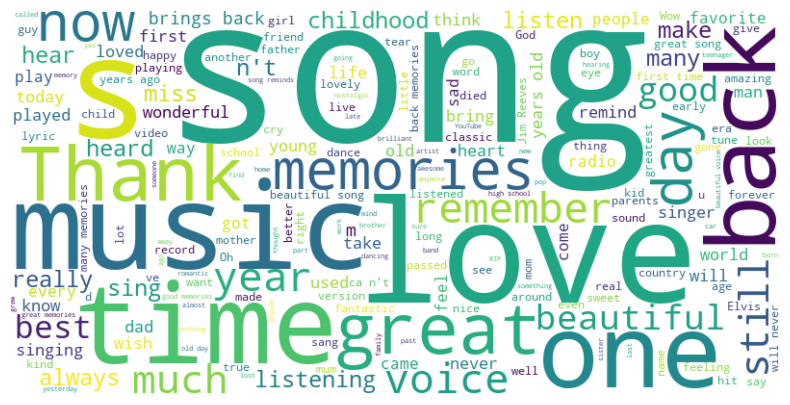

In [113]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming your data is already loaded into a DataFrame
# df is your DataFrame with the 'unigrams' column

# Join the unigrams list into a single string
# The unigrams are assumed to be tokenized into lists, so we join them back
X['unigrams_str'] = X['unigrams'].apply(lambda x: ' '.join(x))

# Combine all unigrams from all comments into one large string
text = ' '.join(X['unigrams_str'])

# Create the word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No axes around the word cloud
plt.show()

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X['comment'], X['nostalgia'], test_size=0.2, random_state=42)

### 3.1 Naive Bayes Classifier with Word Count (Frequency) Features ###

# Initialize CountVectorizer (word frequency-based features)
count_vect = CountVectorizer()

# Transform the training and testing data to word count features
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.transform(X_test)

# Initialize Multinomial Naive Bayes for word frequency features
nb_count = MultinomialNB()

# Train the model
nb_count.fit(X_train_counts, y_train)

# Make predictions
y_pred_count = nb_count.predict(X_test_counts)

# Evaluate the performance
print("MultinomialNB (Word Frequency) Accuracy: ", accuracy_score(y_test, y_pred_count))
print("\nClassification Report for Word Frequency Features:")
print(classification_report(y_test, y_pred_count))

### 3.2 Naive Bayes Classifier with TF-IDF Features ###

# Initialize TfidfVectorizer (TF-IDF-based features)
tfidf_vect = TfidfVectorizer()

# Transform the training and testing data to TF-IDF features
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf = tfidf_vect.transform(X_test)

# Initialize Bernoulli Naive Bayes for TF-IDF features (or GaussianNB if appropriate)
nb_tfidf = BernoulliNB()

# Train the model
nb_tfidf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)

# Evaluate the performance
print("\nBernoulliNB (TF-IDF) Accuracy: ", accuracy_score(y_test, y_pred_tfidf))
print("\nClassification Report for TF-IDF Features:")
print(classification_report(y_test, y_pred_tfidf))

MultinomialNB (Word Frequency) Accuracy:  0.8666666666666667

Classification Report for Word Frequency Features:
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       152
           1       0.82      0.94      0.87       148

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300


BernoulliNB (TF-IDF) Accuracy:  0.8866666666666667

Classification Report for TF-IDF Features:
              precision    recall  f1-score   support

           0       0.92      0.86      0.88       152
           1       0.86      0.92      0.89       148

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300

